# A comparison of text distance algorithms

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use("style.mplstyle")

colors = ["#003f5c", "#d45087", "#ffa600", "#665191", "#ff7c43", "#2f4b7c", "#f95d6a", "#a05195"]

In [10]:
# s1 = "longest"
# s2 = "stone"

s1 = "Obama speaks to the media in Illinois"
s2 = "The president greets the press in Chicago"

corpus = [s1, s2]

print(f"Word one: {s1}\nWord two: {s2}")

vectorizer = CountVectorizer()
vectorizer.fit(corpus)

vector1 = vectorizer.transform([s1]).toarray()
vector2 = vectorizer.transform([s2]).toarray()  

print(f"\nWord one vectorized: {vector1}\nWord two vectorized: {vector2}")

Word one: Obama speaks to the media in Illinois
Word two: The president greets the press in Chicago

Word one vectorized: [[0 0 1 1 1 1 0 0 1 1 1]]
Word two vectorized: [[1 1 0 1 0 0 1 1 0 2 0]]


## Text distance algorithms

- Euclidian distance
- Cosine similarity

In [11]:
def euclidean_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.linalg.norm(vector1 - vector2)
    return distance

def cosine_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    similarity_matrix = cosine_similarity(vector1, vector2)
    distance = 1 - similarity_matrix[0, 0]
    return distance

def manhattan_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.sum(np.abs(vector1 - vector2))
    return distance

def hamming_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.sum(vector1 != vector2)
    return distance

def plot_distances(s1: str, s2: str, vectorizer):
    # Calculate distances
    euclidean_dist = euclidean_distance(s1, s2, vectorizer)
    cosine_dist = cosine_distance(s1, s2, vectorizer)
    manhattan_dist = manhattan_distance(s1, s2, vectorizer)

    # Create a scatter plot
    plt.scatter([s1, s2], [0, euclidean_dist], label='Euclidean', color=colors[0])
    plt.scatter([s1, s2], [0, cosine_dist], label='Cosine', color=colors[1])
    plt.scatter([s1, s2], [0, manhattan_dist], label='Manhattan', color=colors[2])

    # Connect the points with lines
    plt.plot([s1, s2], [0, euclidean_dist], linestyle='-', color=colors[0])
    plt.plot([s1, s2], [0, cosine_dist], linestyle='-', color=colors[1])
    plt.plot([s1, s2], [0, manhattan_dist], linestyle='-', color=colors[2])

    # Annotate the distance values
    plt.text(s1, 0, f'{s1}\n(0, 0)', ha='center', va='bottom')
    plt.text(s2, euclidean_dist, f'{s2}\n({euclidean_dist:.2f}, {euclidean_dist:.2f})', ha='center', va='bottom')
    plt.text(s2, cosine_dist, f'{s2}\n({cosine_dist:.2f}, {cosine_dist:.2f})', ha='center', va='bottom')
    plt.text(s2, manhattan_dist, f'{s2}\n({manhattan_dist:.2f}, {manhattan_dist:.2f})', ha='center', va='bottom')

    # Set labels and title
    plt.xlabel('Sentences')
    plt.ylabel('Distance')
    plt.title('Distances between sentences')
    plt.legend()

    # print(f"Euclidean distance: {euclidean_dist:.2f}, Cosine distance: {cosine_dist:.2f}, Manhattan distance: {manhattan_dist:.2f}, Hamming distance: {hamming_dist}")

    # Show the plot
    plt.figtext(0.5, 0.01, f'Euclidean: {euclidean_dist:.2f}, Cosine: {cosine_dist:.2f}, Manhattan: {manhattan_dist:.2f}', ha='center', va='bottom')
    plt.show()


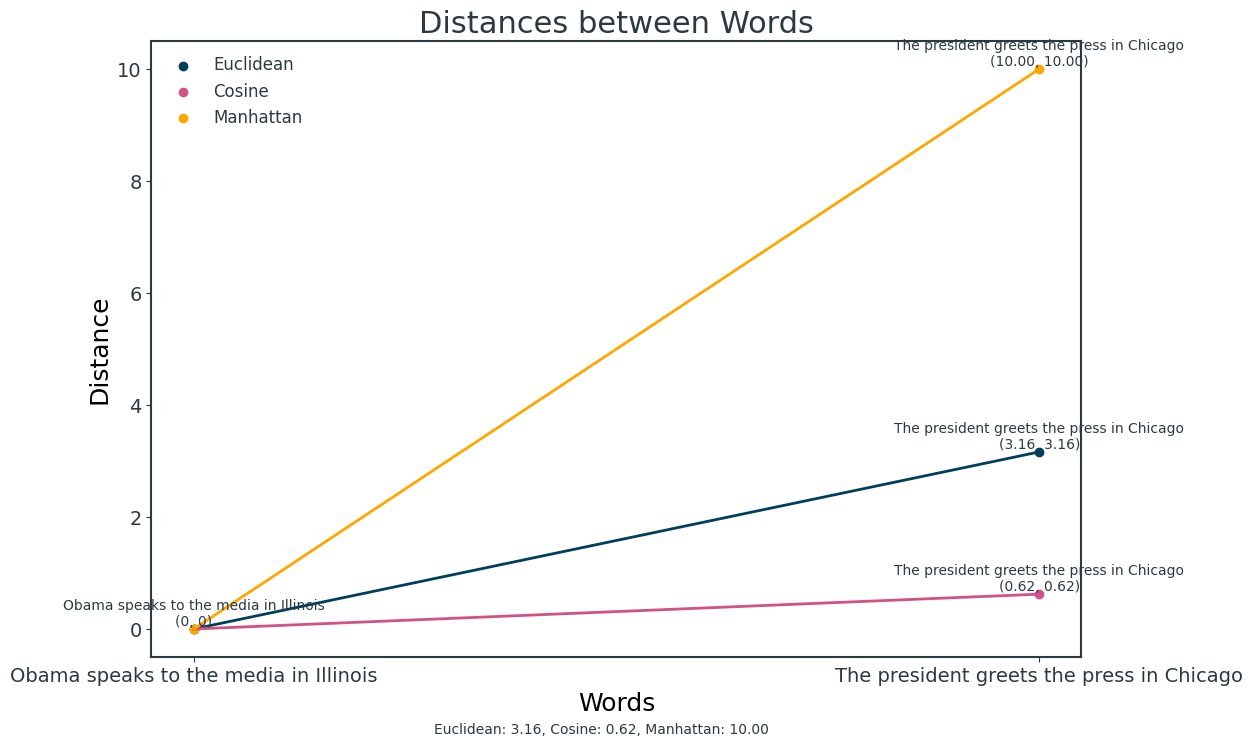

In [12]:
plot_distances(s1, s2, vectorizer=vectorizer)